In [14]:
col_df = pd.read_csv("./new/total.col")
col_df = col_df.sort_values(by=["w"], ascending=False)
col_df.head(133)

,0,1,w
94,vp117,vp178,412
21,vp106,vp117,273
79,vp116,vp179,217
127,vp151,vp173,198
143,vp169,vp64,175
...,...,...,...
186,vp56,vp65,21
56,vp114,vp96,20
158,vp176,vp64,20
46,vp114,vp165,20


In [ ]:
g = nx.from_pandas_edgelist(col_df, "0", "1", create_using=nx.Graph())

ax, fig = plt.subplots(figsize=(40, 20))
nx.draw(g, with_labels=True)

In [ ]:
for node in g.nodes():
    if len(g[node]) % 2 == 1 and len(g[node]) != 1:
        print(node, len(g[node]))

In [ ]:
g["vp113"]

# REAL

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def dfs(graph, start_node):
    visit = list()
    stack = list()
    length = [1]
    stack.append(start_node)
    
    cnt = 0
    while stack:
        length.append(len(stack))
        # print(stack)
        node = stack.pop()
        if node not in visit:
            visit.append(node)
            stack.extend(graph[node])   
    # print(depth)
    
    shor = []
    for i in range(len(visit)-1):
        shor.append(nx.shortest_path_length(graph, visit[i], visit[i+1]))
    
    m = 0
    mm = []
    for j in range(len(shor)):
        #print(shor[j])
        if shor[j] != 1:
            mm.append(m)
            m = 0
        else: 
            m += 1
        mm.append(m)
    return visit, max(mm)


In [3]:
def dfs_R(graph, start):
    import os
    def dfs_recursive(graph, start, visited=[]):
    
        visited = visited + [start]
        with open("./temp", "a") as f:
            #print(visited)
            f.write(f"{str(len(visited))}\n")
        for node in graph[start]:
            if node not in visited:
                dfs_recursive(graph, node, visited)
    
        return visited
    
    dfs_recursive(graph, start)
    
    with open("./temp", "r") as f:
        m = 0
        while True:
            line = f.readline()
            if not line: break
            if m < int(line): 
                m = int(line)
    
    os.remove("./temp")
    
    return m - 1

### dfs test

In [4]:
tg = nx.Graph()
tg.add_edge(1,2)
tg.add_edge(1,7)
tg.add_edge(2,4)
tg.add_edge(2,3)
tg.add_edge(3,5)
tg.add_edge(3,6)
tg.add_edge(4,5)
tg.add_edge(5,8)
tg.add_edge(6,7)

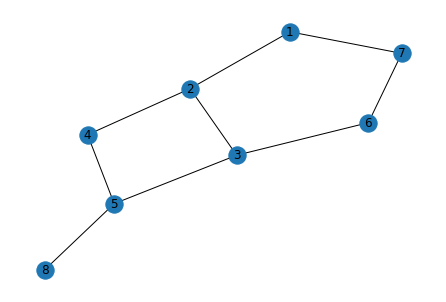

In [5]:
nx.draw(tg, with_labels=True)

In [6]:
dfs(tg, 8)

([8, 5, 4, 2, 3, 6, 7, 1], 7)

In [7]:
dfs_R(tg, 8)

7

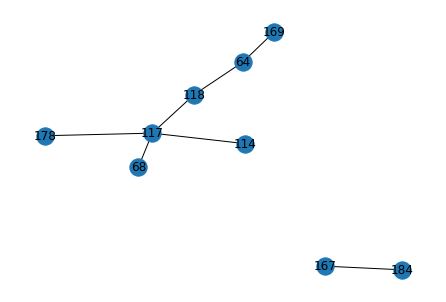

In [8]:
tg2 = nx.Graph()
tg2.add_edge(117,114)
tg2.add_edge(117,118)
tg2.add_edge(117,178)
tg2.add_edge(117,68)
tg2.add_edge(64,118)
tg2.add_edge(64,169)
tg2.add_edge(184,167)
nx.draw(tg2, with_labels=True)

In [9]:
dfs_R(tg2, 68)

4

In [10]:
for node in tg2.nodes():
    v, d = dfs(tg2, node)
    print(node, v, d)

117 [117, 68, 178, 118, 64, 169, 114] 2
114 [114, 117, 68, 178, 118, 64, 169] 2
118 [118, 64, 169, 117, 68, 178, 114] 2
178 [178, 117, 68, 118, 64, 169, 114] 2
68 [68, 117, 178, 118, 64, 169, 114] 2
64 [64, 169, 118, 117, 68, 178, 114] 2
169 [169, 64, 118, 117, 68, 178, 114] 4
184 [184, 167] 1
167 [167, 184] 1


## Return

In [11]:
col_df = pd.read_csv("./new/total.col")
col_df = col_df.sort_values(by=["w"], ascending=False)

col_df.head(26)

,0,1,w
94,vp117,vp178,412
21,vp106,vp117,273
79,vp116,vp179,217
127,vp151,vp173,198
143,vp169,vp64,175
20,vp106,vp117,159
42,vp114,vp117,159
176,vp184,vp69,156
156,vp174,vp68,140
166,vp179,vp67,123


82 7
83 7
84 7
85 7
86 7
87 7
88 7
89 7
117 7
118 7
119 7
120 7
121 7
122 7


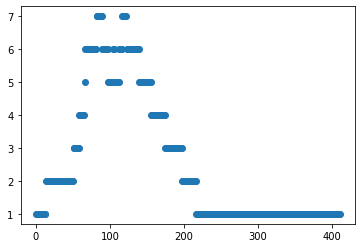

In [12]:
connected_components = []
for i in range(max(col_df["w"])):
    G = nx.from_pandas_edgelist(col_df[col_df["w"] > i], "0", "1", "w", create_using=nx.Graph())
    connected_components.append(len(list(nx.connected_components(G))))

plt.scatter(x = range(max(col_df["w"])), y = connected_components)

for i, c in enumerate(connected_components):
    if c == 7:
        print(i, c)

6


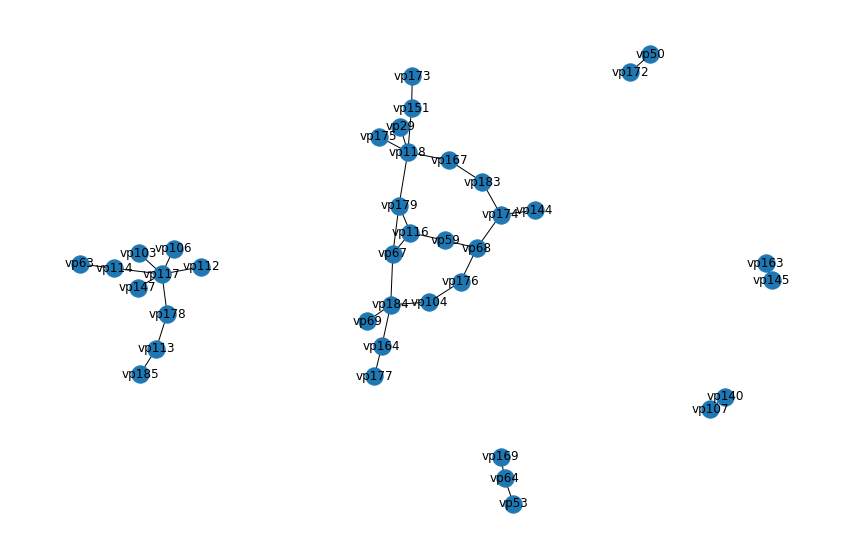

In [17]:
from networkx.exception import NetworkXNoCycle
import random
G = nx.from_pandas_edgelist(col_df[col_df["w"] > 70], "0", "1", "w", create_using=nx.Graph())

cnt = 0
"""
try: 
    while nx.find_cycle(G):
        cnt+=1
        re = random.choice(nx.find_cycle(G))
        G.remove_edge(re[0], re[1])
except NetworkXNoCycle:
    print(cnt)
"""

axxx, figgg = plt.subplots(figsize=(15,10))
nx.draw(G, with_labels=True)
print(len(list(nx.connected_components(G))))

In [14]:
list(nx.connected_components(G))

[{'vp103', 'vp106', 'vp113', 'vp114', 'vp117', 'vp147', 'vp178'},
 {'vp116',
  'vp118',
  'vp151',
  'vp164',
  'vp167',
  'vp173',
  'vp177',
  'vp179',
  'vp184',
  'vp29',
  'vp59',
  'vp67',
  'vp69'},
 {'vp169', 'vp53', 'vp64'},
 {'vp104', 'vp144', 'vp174', 'vp176', 'vp183', 'vp68'},
 {'vp172', 'vp50'},
 {'vp107', 'vp140'},
 {'vp145', 'vp163'}]

In [15]:
import sys
sys.setrecursionlimit(9999999)
# import threading

# G = nx.from_pandas_edgelist(col_df.head(133), "0", "1", create_using=nx.Graph())

group_o = []
group_e = []

# threads = []
start = random.choice(list(G.nodes()))
# start = "vp435"
for c in G.nodes():
    # _, d = dfs(G, c)
    """
    t = threading.Thread(target = dfs_R, args=(G,c))
    t.start()
    threads.append(t)
    """
    # d = dfs_R(G, c)
    #print(d)
    
    d = nx.shortest_path_length(G, start, c)
    if d % 2 == 0:
        group_e.append(c)
    else:
        group_o.append(c)
"""
for t in tqdm(threads):
    t.join()
"""

for e in sorted(group_e):
    print(e, end=",")
print("\n-------------")
for o in sorted(group_o):
    print(o, end=",")

print("\n-------------")
ecnt, ocnt = 0, 0
true = ["gh424", "gh425", "gh426", "gh427", "gh428", "gh429", "gh430", "gh431", "gh432", "gh433", "gh434", "gh435", "gh436"]

for e in sorted(group_e):
    if e in true:
        ecnt+=1
    if e not in true:
        ocnt+=1

print(ecnt, ocnt)
print("-------------")
ecnt, ocnt = 0, 0

for e in sorted(group_o):
    if e in true:
        ecnt+=1
    if e not in true:
        ocnt+=1
        
print(ecnt, ocnt)

NetworkXNoPath: No path between vp103 and vp116.

In [33]:
pos = {}
with open("./new/cotton.gff", "r") as f:
    lines = f.readlines()
    for line in lines:
        pos[line.strip().split("\t")[1]] = line.strip().split("\t")[0]

In [15]:
pos["NP_001313746.1"]

'gh436'

In [16]:
import Bio.SeqIO as SeqIO

group1 = {}
group2 = {}
with open("./new/cotton.faa", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
        try:
            if pos[record.id] in group_o:
                group1[record.id] = str(record.seq)
            elif pos[record.id] in group_e:
                group2[record.id] = str(record.seq)
        except KeyError:
            continue

In [17]:
with open("./new/cottongroup1.aa", "w") as f1:
    for k, v in group1.items():
        f1.write(f">{k}\n")
        f1.write(f"{v}\n")

with open("./new/cottongroup2.aa", "w") as f2:
    for k, v in group2.items():
        f2.write(f">{k}\n")
        f2.write(f"{v}\n")

# Do not run

In [53]:
def read_colinearity(filepath):
    collinearity = {}
    
    with open(filepath, "r") as f:
        lines = f.readlines()
        for line in lines:
            #print(list(line.split()[0]))
            if line.split()[0] == "##":
                collinearity[line.split()[6]] = []

        for line in lines:
            if line.split()[0] == "##":
                name = line.split()[6]
                pm = line.split()[7]
                collinearity[name].append([pm])
                continue
            if line.split()[0] != "#":
                #print(list(line.split(" ")[0]))
                if "-" in list(line.split()[0]):
                    collinearity[name].append(line.split("\t")[1:3])
        
        real_collinearity = {}
        for k, v in collinearity.items():
            if len(v) != 0:
                real_collinearity[k] = v
                
    return real_collinearity

In [54]:
col = read_colinearity("./new/total.collinearity")

In [55]:
def write_collinearity(filepath, ob):
    with open(filepath, "w") as f:
        """
        f.write(f"############### Parameters ###############\n")
        f.write("# MATCH_SCORE: 50\n")
        f.write("# MATCH_SIZE: 2\n")
        f.write("# GAP_PENALTY: 0\n")
        f.write("# OVERLAP_WINDOW: 5\n")
        f.write("# E_VALUE: 100\n")
        f.write("# MAX GAPS: 25\n")
        f.write("############### Statistics ###############\n")
        f.write("# Number of collinear genes: 23966, Percentage: 44.71\n")
        f.write("# Number of all genes: 53605\n")
        f.write("##########################################\n")
        """
        for i, (k, v) in enumerate(ob.items()):
            f.write(f"## Alignment {i} score=300 e_value=2 N={len(v)-1} {k} {v[0][0]}\n")
            cnt = 0
            for l in v:
                if len(l) != 1:
                    f.write(f"  {i}-  {cnt}:\t{l[0]}\t{l[0]}\t0\n")
                    cnt += 1

In [57]:
groups = []
for o in group_o:
    for e in group_e:
        groups.append(f"{o}&{e}")
        groups.append(f"{e}&{o}")

joined_col = {}
for group in groups:
    try:
        joined_col[group] = col[group]
    except KeyError:
        continue

In [58]:
write_collinearity("./revised.collinearity", joined_col)

In [59]:
def key(x):
    temp = [0]
    #print("-------")
    # print(x)
    for k, v in joined_col.items():
        if f"{x}" in str(k).split("&")[0]:
            temp.append(int(v[:][:][1][0].split(".")[0][1:]))
            # print(v[:][:][0])
        elif f"{x}" in str(k).split("&")[1]:
            temp.append(int(v[:][:][1][1].split(".")[0][1:]))
            # print(temp)
        
    return sum(temp) / len(temp)

In [64]:
sorted_group1 = sorted(group_e, key=key)
sorted_group2 = sorted(group_o, key=key)

for g1 in sorted_group1:
    print(g1, end=",")
print("\n-------------------------")
for g2 in sorted_group2:
    print(g2, end=",")

vp69,vp181,vp159,vp101,vp139,vp144,vp52,vp175,vp165,vp140,vp173,vp96,vp182,vp115,vp168,vp63,vp65,vp55,vp133,vp154,vp104,vp164,vp183,vp163,vp111,vp67,vp27,vp29,vp185,vp50,vp64,vp117,vp68,
-------------------------
vp178,vp167,vp184,vp108,vp107,vp118,vp80,vp177,vp106,vp147,vp179,vp70,vp145,vp53,vp113,vp171,vp176,vp36,vp56,vp162,vp169,vp172,vp109,vp142,vp114,vp112,vp174,vp59,vp151,vp103,vp116,

In [65]:
assembly = {0:[], 1:[], "w":[]}
for k, v in joined_col.items():
    assembly[0].append(k.split("&")[0])
    assembly[1].append(k.split("&")[1])
    assembly["w"].append(len(v))

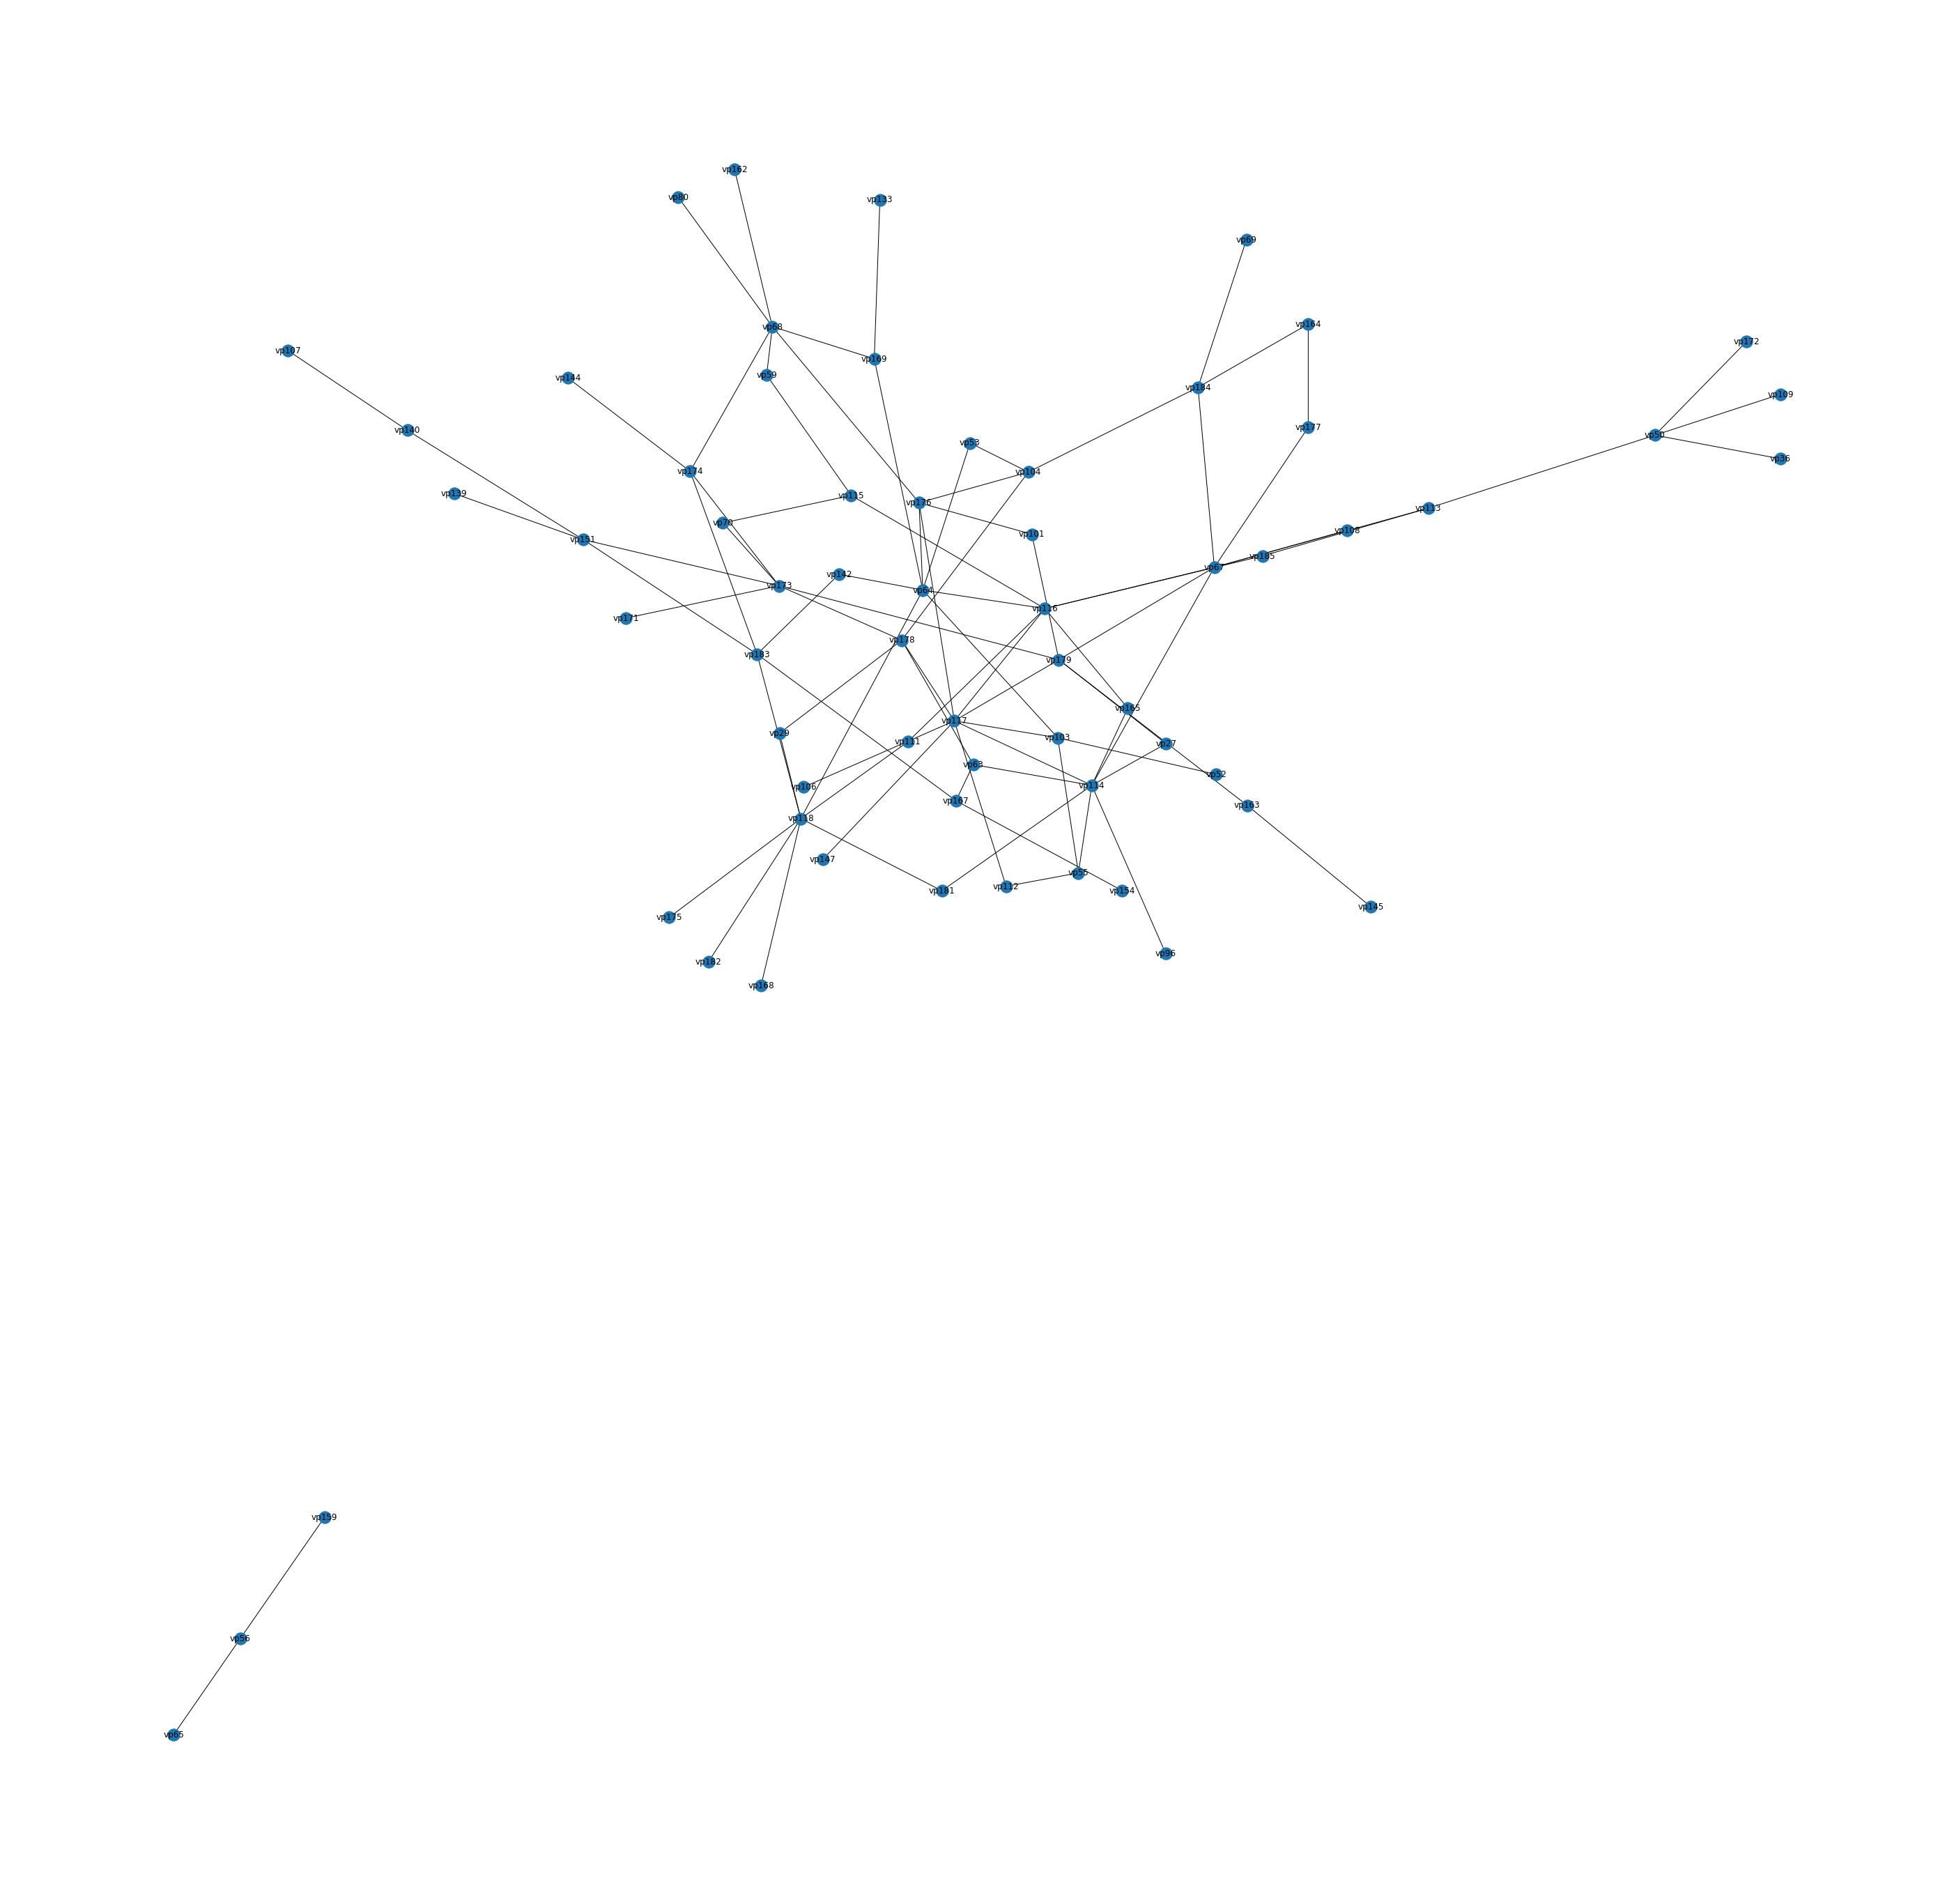

In [66]:
assembly_df = pd.DataFrame(assembly)
assembly_g = nx.from_pandas_edgelist(assembly_df, 0, 1, create_using=nx.Graph(), edge_attr="w")

axx, figg = plt.subplots(figsize=(50,50))
nx.draw(assembly_g, with_labels=True)